In [1]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr

In [2]:
ds2015 = xr.open_dataset('./content/precip.2015.nc')
ds2021 = xr.open_dataset('./content/precip.2021.nc')
ds2015

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...

In [3]:
ds2015_2021 = xr.concat([ds2015,ds2021], dim='time')
ds2015_2021

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 730)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2021-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan ... 0.5242 0.5236 0.5231
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...

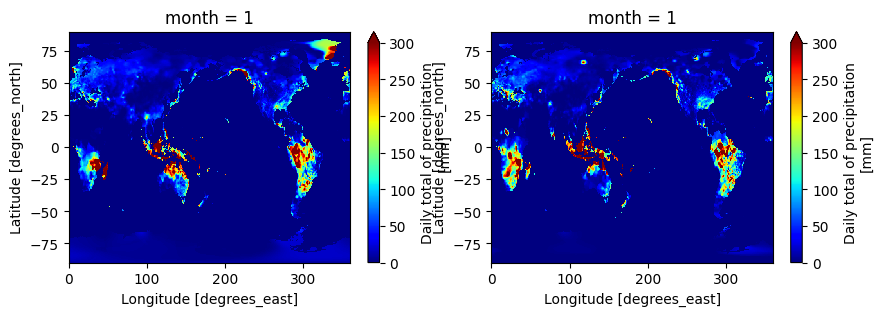

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
ds2015_mon = ds2015.groupby('time.month').sum()
ds2015_mon.precip[0,:,:].plot(cmap='jet', vmax=300)
plt.subplot(1, 2, 2)
ds2021_mon = ds2021.groupby('time.month').sum()
ds2021_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

In [5]:
import calendar

In [6]:
landmask = ds2015.precip.sum(dim='time') > 0

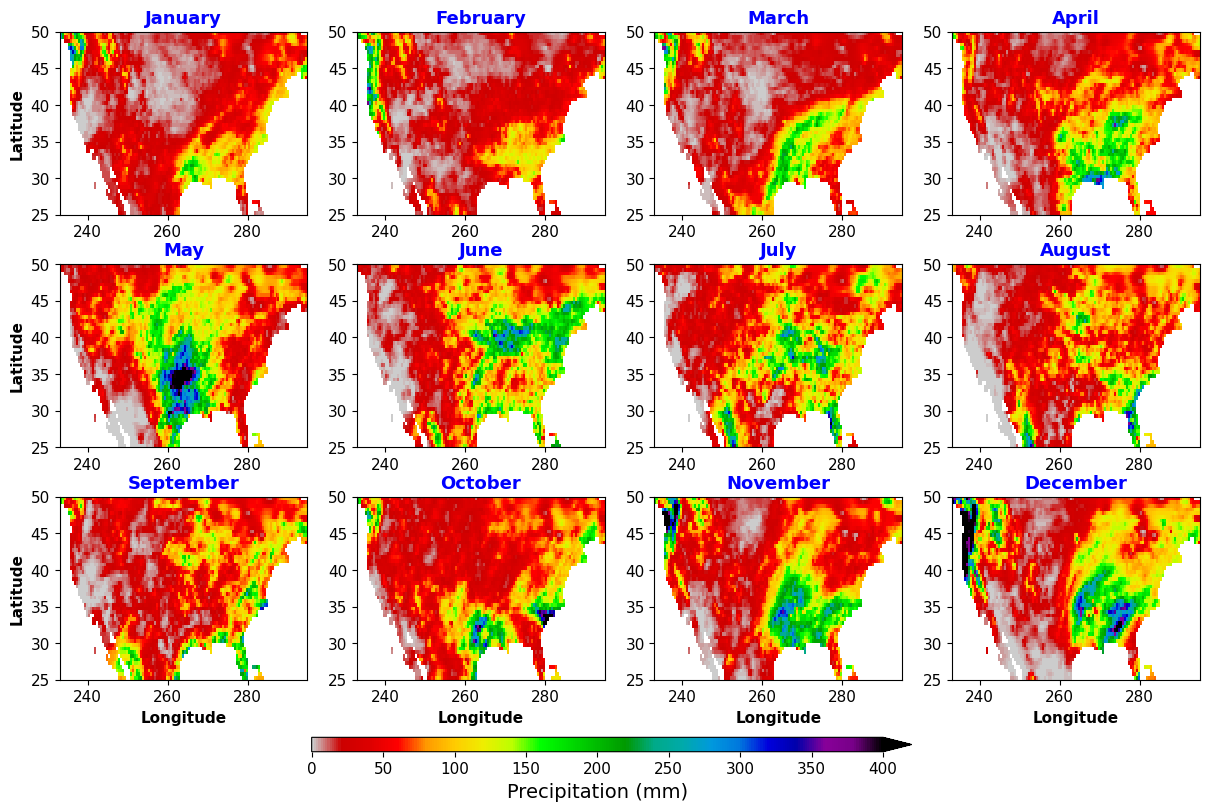

In [7]:
fig = plt.figure(figsize=[12, 8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99,
                    wspace=0.2, hspace=0.27)
nrows = 3
ncols = 4
for i in range(1, 13):
    # Pythonのインデックスは0から始まるがsubplotは1から始まる
    plt.subplot(nrows, ncols, i)
    dataplot = ds2015_mon.precip[i-1, :].where(landmask)
    p = plt.pcolormesh(ds2015_mon.lon, ds2015_mon.lat, dataplot,
                       vmax=400, vmin=0, cmap='nipy_spectral_r',
                       )
    plt.xlim([233, 295])
    plt.ylim([25, 50])
    plt.title(calendar.month_name[dataplot.month.values], fontsize=13,
              fontweight='bold', color='b')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    if i % ncols == 1: # 左端のサブプロットにY軸ラベルを追加
        plt.ylabel('Latitude', fontsize=11, fontweight='bold')
    if i > ncols * (nrows - 1): # 最下段のサブプロットにX軸ラベルを追加
        plt.xlabel('Longitude', fontsize=11, fontweight='bold')

# カラーバーを下部に追加
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend='max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color='k', size=14)

# 高解像度(300dpi)版の図を保存
plt.savefig('Fig_prec_cpc_mon_2015.png', format='png', dpi=300)

In [8]:
ds2021.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [9]:
seasonal_mean = ds2021.groupby('time.season').sum()
seasonal_mean = seasonal_mean.reindex(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, season: 4)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    precip   (season, lat, lon) float32 0.0 0.0 0.0 0.0 ... 13.06 13.2 13.19
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history:        Updated 2022-01-02 23:30:58

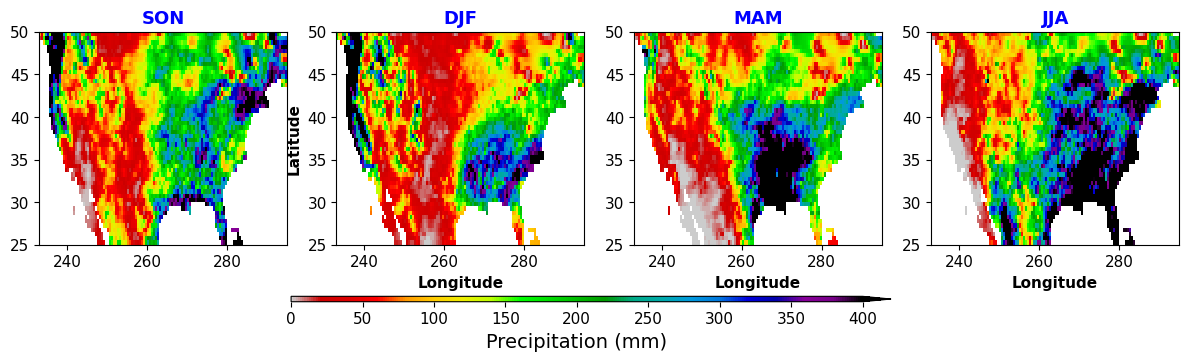

In [22]:
season=["DJF", "MAM", "JJA", "SON"]
fig = plt.figure(figsize=[12,3], facecolor='w')
plt.subplots_adjust(bottom=0.25, top=0.96, left=0.04, right=0.99,
                   wspace=0.2, hspace=0.27)

for i in range(4):
    plt.subplot(1, 4, i+1)
    dataplot = seasonal_mean.precip[i-1, :].where(landmask)
    p = plt.pcolormesh(seasonal_mean.lon, seasonal_mean.lat, dataplot, vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',)
    plt.xlim([233,295])
    plt.ylim([25,50])
    plt.title(season[i-1], fontsize = 13, fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)